# Problem Statement :

## The following data is collected from the Customers visiting a Mall. Considering this data, divide the data into various clusters to see how much do the Customers are likely to spend their money for shopping, given their Annual Income and other factors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data = df.copy()

## Preprocessing

In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### No null values present within the dataset

## Exploratory Data Analysis (EDA)

## Correlation Heatmap

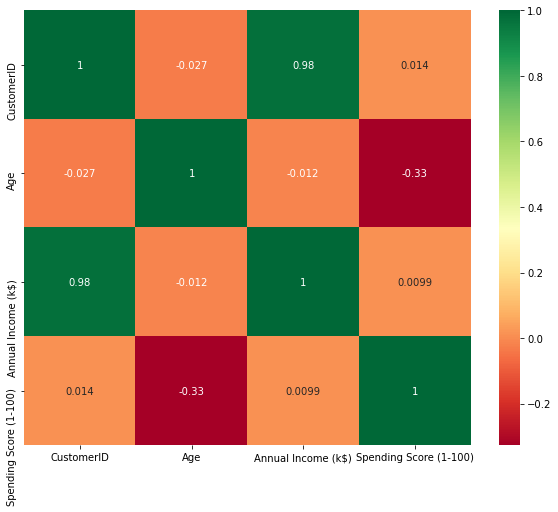

In [5]:
corr = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

### The correlation among the I/p features is not high enough to drop any feature

## Outliers

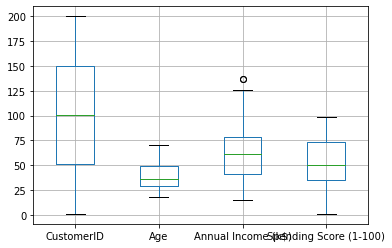

In [6]:
data.boxplot()
plt.show()

### There aren't much outliers present within the dataset

## OneHotEncoding

In [7]:
dummies = pd.get_dummies(data['Gender'], drop_first=True)

In [8]:
data = pd.concat([data, dummies], axis=1)

In [9]:
data.drop(['Gender'], axis=1, inplace=True)

In [10]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


## Feature Scaling : Standardizing

In [11]:
# Copy for column names
data_cols = data.copy()

In [12]:
sc = StandardScaler()

In [13]:
data = sc.fit_transform(data)

In [14]:
data = pd.DataFrame(data, columns=data_cols.columns)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,-1.723412,-1.424569,-1.738999,-0.434801,1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,-0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,-0.886405


## Clustering

In [15]:
kmeans = KMeans(n_clusters=3)

In [16]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [17]:
# 3 clusters
clusters = kmeans.predict(data)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## Reducing the dimensions using PCA to visualize them

In [18]:
pca = PCA(n_components=2)

In [19]:
reduced_data = pca.fit_transform(data)

In [20]:
reduced_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_data

,PC1,PC2
0,-2.316965,-0.454190
1,-2.272391,-1.474104
2,-2.454223,-0.006922
3,-2.386461,-1.749935
4,-2.397377,-0.369341
...,...,...
195,2.727733,-1.116329
196,2.834568,0.739030
197,3.073113,-0.644900
198,3.331988,0.854022


In [21]:
reduced_data['clusters'] = clusters

In [22]:
reduced_data

,PC1,PC2,clusters
0,-2.316965,-0.454190,0
1,-2.272391,-1.474104,0
2,-2.454223,-0.006922,0
3,-2.386461,-1.749935,0
4,-2.397377,-0.369341,0
...,...,...,...
195,2.727733,-1.116329,1
196,2.834568,0.739030,1
197,3.073113,-0.644900,1
198,3.331988,0.854022,1


In [23]:
# Cluster centers(centroids) for the actual data
kmeans.cluster_centers_

array([[-0.91571936, -0.91464757, -0.88052186,  0.29940277, -0.17954301],
       [ 1.02408784, -0.24490383,  0.96005657,  0.08104001,  0.09569148],
       [-0.47192101,  1.13852727, -0.42245682, -0.37379617,  0.04093069]])

In [24]:
# Cluster centers(centroids) for the reduced data
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[-1.24456147, -0.89914479],
       [ 1.41451728, -0.17608719],
       [-0.67018062,  1.03711473]])

## Visualizing the Clusters along with their centroids

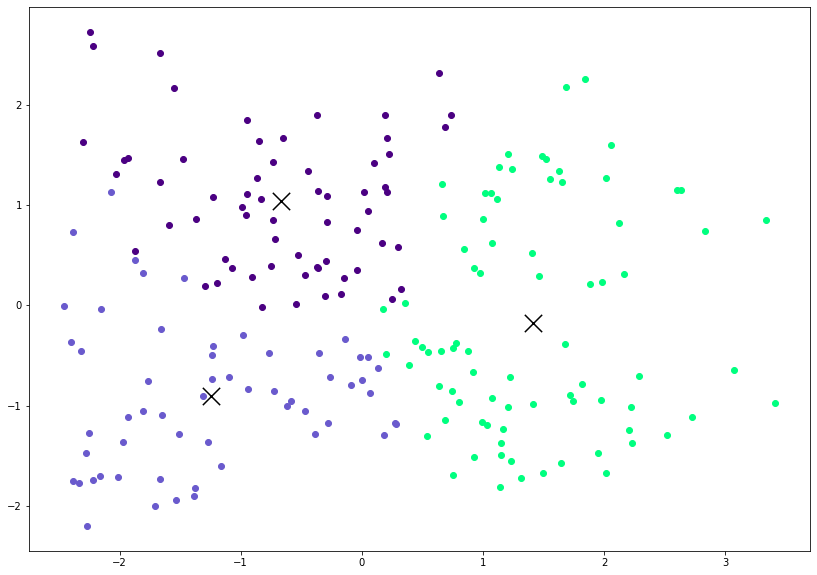

In [25]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['clusters'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 0].loc[:, 'PC2'], color='slateblue')
plt.scatter(reduced_data[reduced_data['clusters'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 1].loc[:, 'PC2'], color='springgreen')
plt.scatter(reduced_data[reduced_data['clusters'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 2].loc[:, 'PC2'], color='indigo')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.show()